In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Did you know?


**You can solve linear regression in 3 lines of code. There is an inbuilt function in numpy called
linalg that SAVES LIVES (of Statisticians atleast).**


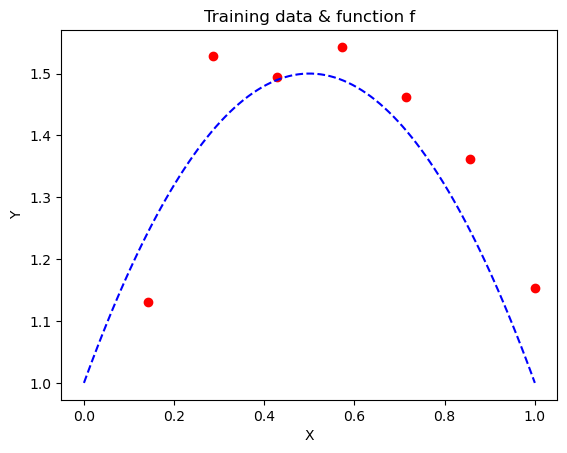

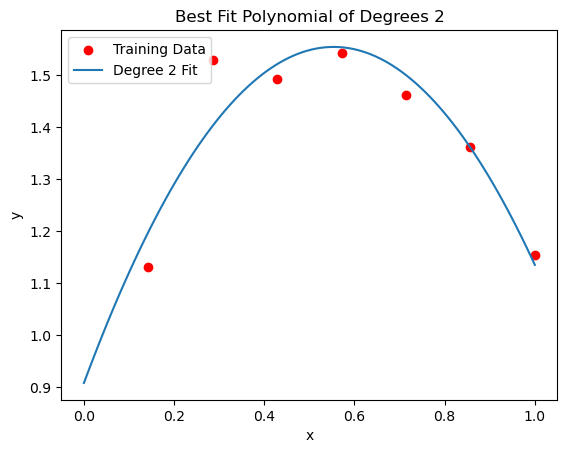

In [3]:
def f(x):
    return 1 + 2*x - 2*x**2

noise = np.random.normal(0,1,7)
X, Y, F = [], [], []
for i in range(7):
    x = (i+1)/7
    y = f(x)
    X.append(x)
    F.append(y)
    Y.append(y + 0.1*noise[i])

plt.figure()
plt.scatter(X, Y, label='Training Data', color='red')
x = np.linspace(0, 1, 100)
y = f(x)
plt.plot(x, y, label='True Function', linestyle='--', color='blue')
plt.title("Training data & function f")
plt.xlabel("X")
plt.ylabel("Y")

d = 2

degrees = np.arange(7)
MSE, MSE_test = [], []
X_copy = X
x_test, y_test, f_test = [], [], []
noise = np.random.normal(0, 1, 1000) # guassian noise - mean 0, standard deviation 1. I am sampling 1000 points from this distribution.
for idx in range(1000):
    xVal = (idx+1)/1000
    fVal = f(xVal)
    yVal = fVal + 0.1*noise[idx]
    x_test.append(xVal)
    y_test.append(yVal)

# Solve for our parameters.
X = np.vander(X_copy, d+1, increasing=True)
# print(X)
theta = np.linalg.solve(X.T @ X, X.T @ Y) # Yup, thats it :)
y_fit = np.polyval(np.flip(theta), x)

plt.figure()
plt.scatter(X_copy, Y, label='Training Data', color='red')
plt.plot(x, y_fit, label=f'Degree {d} Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Fit Polynomial of Degrees ' + str(d))
plt.legend()

## Homework: Can you figure out what np.polyval and np.vander is doing here?

### But we are computer scientits destined to learn gradient descent!

We will walk through each step one by one and plot our results.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Compute Loss (mean squared error)
def compute_Loss(X, y, theta):
    m = len(y)
    predictions = fit(X, theta)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2) # normalized MSE. 

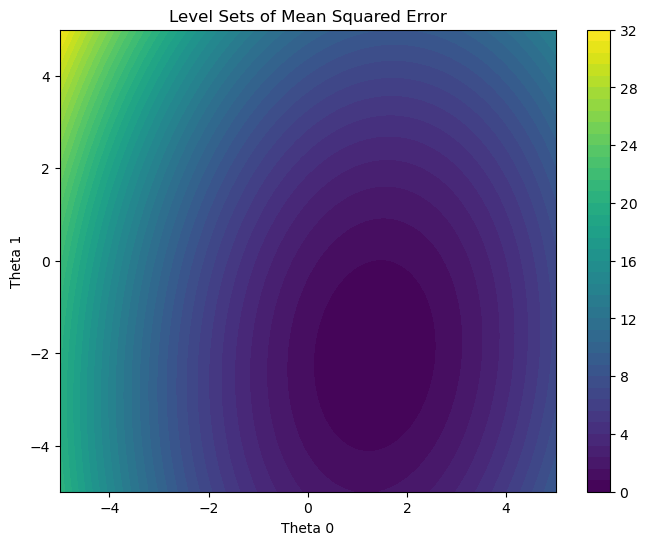

In [3]:
## LEVEL SETS.

def fit(X, theta):
    return np.dot(X, theta)

def generate_data(n_samples=100):
    np.random.seed(42)
    X = 2 * np.random.rand(n_samples, 1) - 1  # Random values between -1 and 1
    y = 1 - 2 * X + X**2  # True function: f(x) = 1 - 2x + x^2
    y = y.ravel()  # Flatten y to 1D
    return X, y

X, y = generate_data(n_samples=100)
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

w0_range = np.linspace(-5, 5, 100)
w1_range = np.linspace(-5, 5, 100)
W0, W1 = np.meshgrid(w0_range, w1_range)
# ax = fig.add_subplot(111, projection='3d')
# Calculate MSE for each combination of w0 and w1
Z = np.zeros_like(W0)
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        w_temp = np.array([W0[i, j], W1[i, j]])  # Combination of w0 and w1
        Z[i, j] = compute_Loss(X_bias, y, w_temp)

# Plot the contour plot (level sets of MSE)
plt.figure(figsize=(8, 6))
contour = plt.contourf(W0, W1, Z, levels=50)
plt.colorbar(contour)
plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
plt.title('Level Sets of Mean Squared Error')
plt.show()

plt.show() 

Batch Gradient Descent final parameters (theta): [0.96608029 2.02595242]
Stochastic Gradient Descent final parameters (theta): [0.91302783 2.12772572]


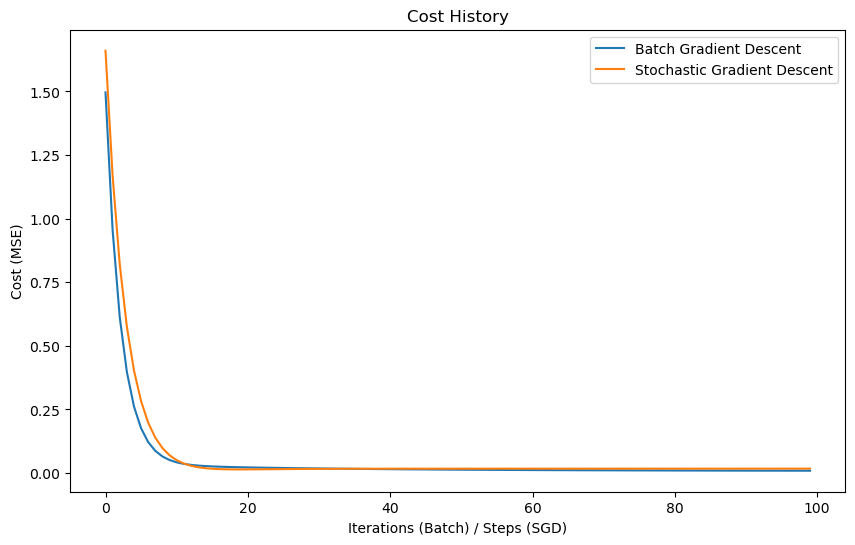

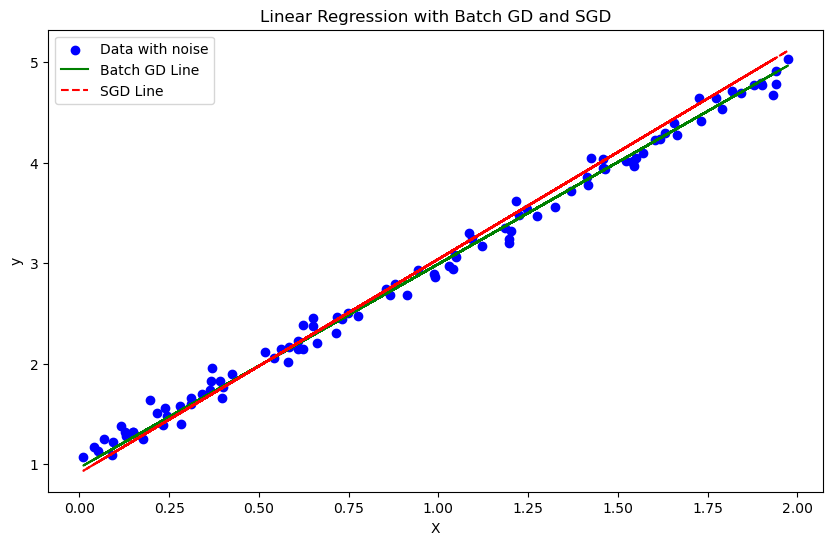

In [145]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for y = 1 + 2x with Gaussian noise
np.random.seed(42)  # For reproducibility
n_samples = 100
X = 2 * np.random.rand(n_samples, 1)  # Random input values in range [0, 2]
y_true = 1 + 2 * X  # True values without noise
y = y_true + 0.1*np.random.randn(n_samples, 1)  # Adding Gaussian noise

# Add a intercept term (x0 = 1)
X_b = np.c_[np.ones((n_samples, 1)), X]  # X_b becomes [1, x] for each sample

# Function to compute cost (Mean Squared Error)
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    cost = np.mean(np.square(predictions - y))
    return cost

# Batch Gradient Descent
def batch_gradient_descent(X, y, theta, learning_rate=0.1, n_iterations=1000):
    d = {}
    m = len(y)
    cost_history = np.zeros(n_iterations)
    
    for i in range(n_iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)  # Gradient calculation
        theta -= learning_rate * gradients  # Update theta
        cost_history[i] = compute_cost(X, y, theta)  # Store the cost for each iteration
        d[cost_history[i]] = theta.ravel()
    
    return theta, cost_history, d

# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, theta, learning_rate=0.1, n_epochs=50):
    m = 1 # defining my batch size i.e. number of random samples i want to take.
    cost_history = np.zeros(m * n_epochs)
    t = 0  # Keeps track of the update steps
    d = {}
    
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)  # Randomly pick one sample
            xi = X[random_index:random_index+1]  # Single training example
            yi = y[random_index:random_index+1]
            gradients = xi.T.dot(xi.dot(theta) - yi)
            theta -= learning_rate * gradients  # Update theta
            cost_history[t] = compute_cost(X, y, theta)  # Store the cost
            d[cost_history[t]] = theta.ravel()
            t += 1
            
    
    return theta, cost_history, d

# Initializing theta (2 parameters: intercept and slope)
theta_init = np.random.randn(2, 1)

# Hyperparameters
learning_rate = 0.1
n_epochs = 100

# Perform Batch Gradient Descent
theta_batch, cost_history_batch, batch_history = batch_gradient_descent(X_b, y, theta_init.copy(), learning_rate, n_epochs)

# Perform Stochastic Gradient Descent
theta_sgd, cost_history_sgd, sgd_history = stochastic_gradient_descent(X_b, y, theta_init.copy(), learning_rate, n_epochs)

# Print the final parameters
print("Batch Gradient Descent final parameters (theta):", theta_batch.ravel())
print("Stochastic Gradient Descent final parameters (theta):", theta_sgd.ravel())

# Plot the cost history for both methods
plt.figure(figsize=(10, 6))
plt.plot(cost_history_batch, label='Batch Gradient Descent')
plt.plot(cost_history_sgd, label='Stochastic Gradient Descent')
plt.ylabel('Cost (MSE)')
plt.xlabel('Iterations (Batch) / Steps (SGD)')
plt.title('Cost History')
plt.legend()
plt.show()

# Plot the data and the regression lines
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data with noise', color='blue')
plt.plot(X, X_b.dot(theta_batch), label='Batch GD Line', color='green')
plt.plot(X, X_b.dot(theta_sgd), label='SGD Line', color='red', linestyle='--')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Batch GD and SGD')
plt.legend()
plt.show()


In [146]:
# add mre fig to plot the convergence onto the contour plot.
# Lets see our algorithm visually

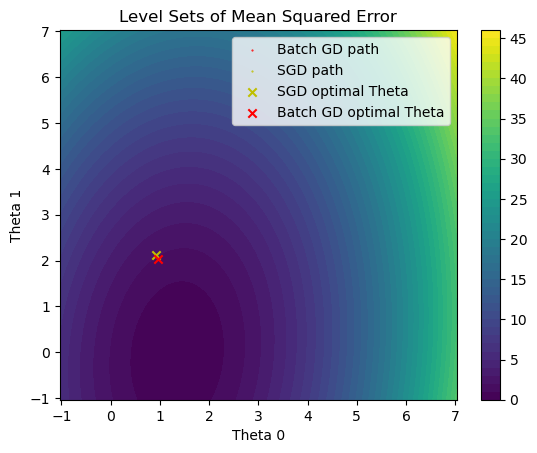

In [150]:
## PATH OF BATCH GRADIENT DESCENT
def generate_data(n_samples=100):
    np.random.seed(42)
    X = 2 * np.random.rand(n_samples, 1) - 1  # Random values between -1 and 1
    y = 1 + X**2  # True function: f(x) = 1 - 2x + x^2
    y = y.ravel()  # Flatten y to 1D
    return X, y

def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    cost = np.mean(np.square(predictions - y))
    return cost

X, y = generate_data(n_samples=100)
X_bias = np.c_[np.ones((X.shape[0], 1)), X]
w0_range = np.linspace(theta_batch[0]-2, theta_batch[1]+5, 100)
w1_range = np.linspace(theta_batch[0]-2, theta_batch[1]+5, 100)
W0, W1 = np.meshgrid(w0_range, w1_range)
# ax = fig.add_subplot(111, projection='3d')
# Calculate MSE for each combination of w0 and w1
Z = np.zeros_like(W0)
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        w_temp = np.array([W0[i, j], W1[i, j]])  # Combination of w0 and w1
        Z[i, j] = compute_cost(X_bias, y, w_temp)

path_t0_batch, path_t1_batch = [],[]
for k,v in batch_history.items():
    path_t0_batch.append(v[0])
    path_t1_batch.append(v[1])


path_t0_sgd, path_t1_sgd = [],[]
for k,v in batch_history.items():
    path_t0_sgd.append(v[0])
    path_t1_sgd.append(v[1])
# Plot the contour plot (level sets of MSE)
plt.figure()
contour = plt.contourf(W0, W1, Z, levels=50)
plt.colorbar(contour)
plt.scatter(path_t0_batch, path_t1_batch, marker = '.', s = 1, color = 'r', label = 'Batch GD path')
plt.scatter(path_t0_sgd, path_t1_sgd, marker = '.', s = 1, color = 'y', label = 'SGD path')
plt.scatter(theta_sgd[0], theta_sgd[1], marker = 'x', color = 'y', label = 'SGD optimal Theta')
plt.scatter(theta_batch[0], theta_batch[1], marker = 'x', color = 'r', label = 'Batch GD optimal Theta')
plt.xlabel('Theta 0')
plt.ylabel('Theta 1')
plt.title('Level Sets of Mean Squared Error')
plt.legend()
plt.show()


